семинар

In [93]:
import numpy as np
import matplotlib.pyplot as plt

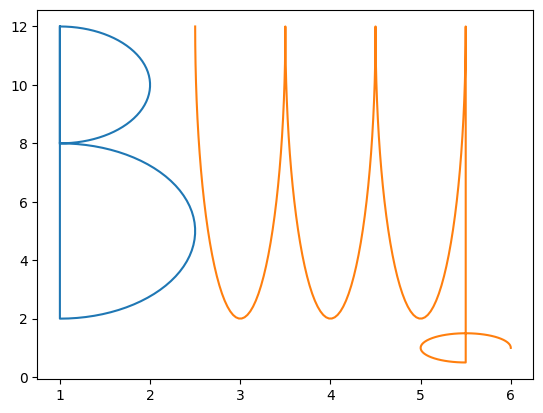

In [94]:
t = np.linspace(-np.pi/2, np.pi/2)
Y = 10 + 2*np.sin(t)
X = 1 + np.cos(t)
Y1 = 5 + 3*np.sin(t)
X1 = 1 + 1.5*np.cos(t)
X = np.append(X,X1)
Y = np.append(Y,Y1)
X = np.append(X,1)
Y = np.append(Y,12)

plt.plot(X,Y)

t = np.linspace(np.pi, 2*np.pi)
X = 3 + 0.5*np.cos(t)
Y = 12 + 10*np.sin(t)
X = np.append(X, 4 + 0.5*np.cos(t))
Y = np.append(Y, 12 + 10*np.sin(t))
X = np.append(X, 5 + 0.5*np.cos(t))
Y = np.append(Y, 12 + 10*np.sin(t))
X = np.append(X, 5.5)
Y = np.append(Y, 0.5)

t = np.linspace(3*np.pi/2, 0)
X = np.append(X, 5.5 + 0.5*np.cos(t))
Y = np.append(Y, 1 + 0.5*np.sin(t))

plt.plot(X, Y)
plt.show()


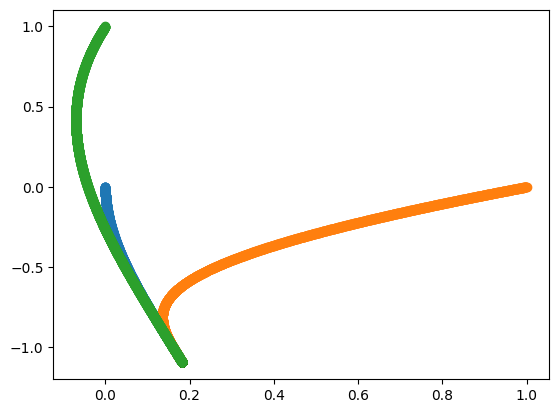

In [95]:
def grad_opt(x, y, step, iter):
    opt = np.zeros((iter, 2))
    for i in range(iter):
        opt[i, :] = x, y
        L = (grad_f(x, y)[0]**2+grad_f(x, y)[1]**2)**0.5
        if L > 0:
            x += -grad_f(x, y)[0]/L*step
            y += -grad_f(x, y)[1]/L*step
    return opt

def f(x, y):
    return 3*x**2 + x*y + y**2 + 2*y

def grad_f(x, y):
    return 6*x + y, 2*y + x + 2

res = grad_opt(0, 0, 0.001, 6000)
plt.scatter(res[:, 0], res[:, 1])
res = grad_opt(1, 0, 0.001, 6000)
plt.scatter(res[:, 0], res[:, 1])
res = grad_opt(0, 1, 0.001, 6000)
plt.scatter(res[:, 0], res[:, 1])
plt.show()

лаба

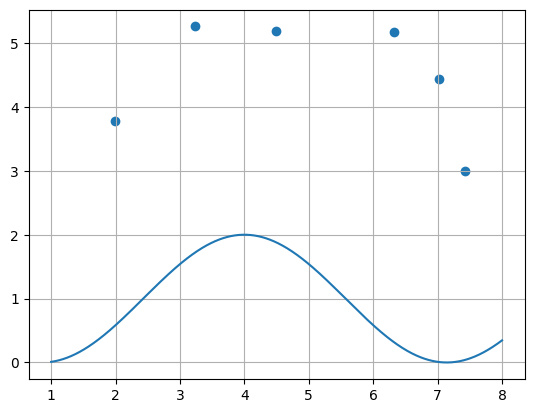

In [96]:
P = np.array([
  [7.43, 2.99],
  [7.02, 4.44],
  [6.32, 5.17],
  [4.49, 5.19],
  [3.24, 5.26],
  [1.99, 3.78]
])

X = np.linspace(1, 8, 5000)
Y = np.cos(X-4) + 1

plt.scatter(P[:,0], P[:,1])
plt.plot(X, Y)
plt.grid()
plt.show()

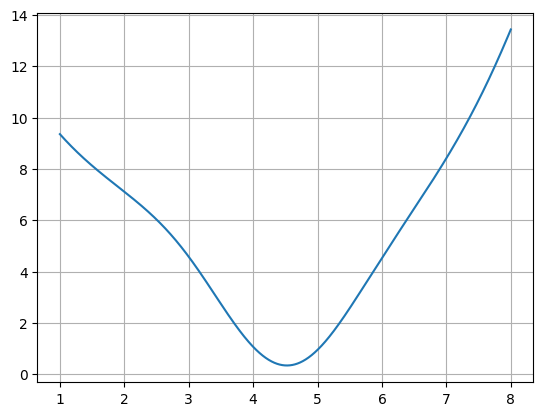

In [97]:
R = np.zeros((len(X), 6))
r = np.zeros(len(X))
sum_kv = np.zeros(len(X))
for j in range(len(X)):
  sum_kv[j] = 0
  for i in range (6):
    R[j,i] = ((X[j]-P[i,0])**2 + (Y[j]-P[i,1])**2)**0.5
  r[j] = np.mean(R[j,:])
  for i in range(6):
    sum_kv[j] += (R[j,i]-r[j])**2


plt.plot(X, sum_kv)
plt.grid()
plt.show()

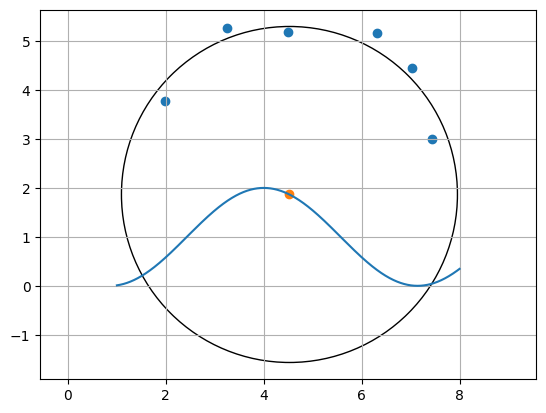

In [99]:
def goldenRatio(a, b, eps = 1e-8):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi

    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = sum_kv[int(x1)]
    f2 = sum_kv[int(x2)]

    while abs(a - b) > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = sum_kv[int(x1)]
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = sum_kv[int(x2)]
    
    return (a + b) / 2

result = int(goldenRatio(0, X.size - 1))
X_center = round(X[result], 3)
Y_center = round(Y[result], 3)
radius = round(r[result], 3)

plt.axis('equal')
plt.grid()
plt.plot(X, Y)
plt.scatter(P[:, 0], P[:, 1])
plt.scatter(X_center, Y_center)
plt.gca().add_patch(plt.Circle((X_center, Y_center), radius, fill=False))

plt.show()